# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif,f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import TargetEncoder
import pickle

import warnings

# Ignore the specific warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


In [2]:
np.random.seed(42)

## Function conf_matrix
* To preview the confusion matrix and classification report

In [3]:
def conf_matrix(x, y, title, show_report=False):
    cm = confusion_matrix(x, y)
    plt.figure(figsize=(6, 4))

    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", cbar=False)
    plt.title(f'Confusion Matrix - {title} Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    if not show_report:
        print("F1 scores: ", f1_score(x, y))

    if show_report:
        report = classification_report(x, y)
        print("Classification Report:")
        print(report)
        plt.show()
    return f1_score(x, y)

# 1

## Data Analysis

### Read Data

In [4]:
static_dataset=pd.read_csv("AI_Assignment_3/Static_dataset.csv")

In [5]:
static_dataset.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [6]:
static_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

### Showing Some statistic 

In [7]:
static_dataset.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [8]:
static_dataset.shape

(268074, 16)

### Plot histograms for each feature to visualize their distributions

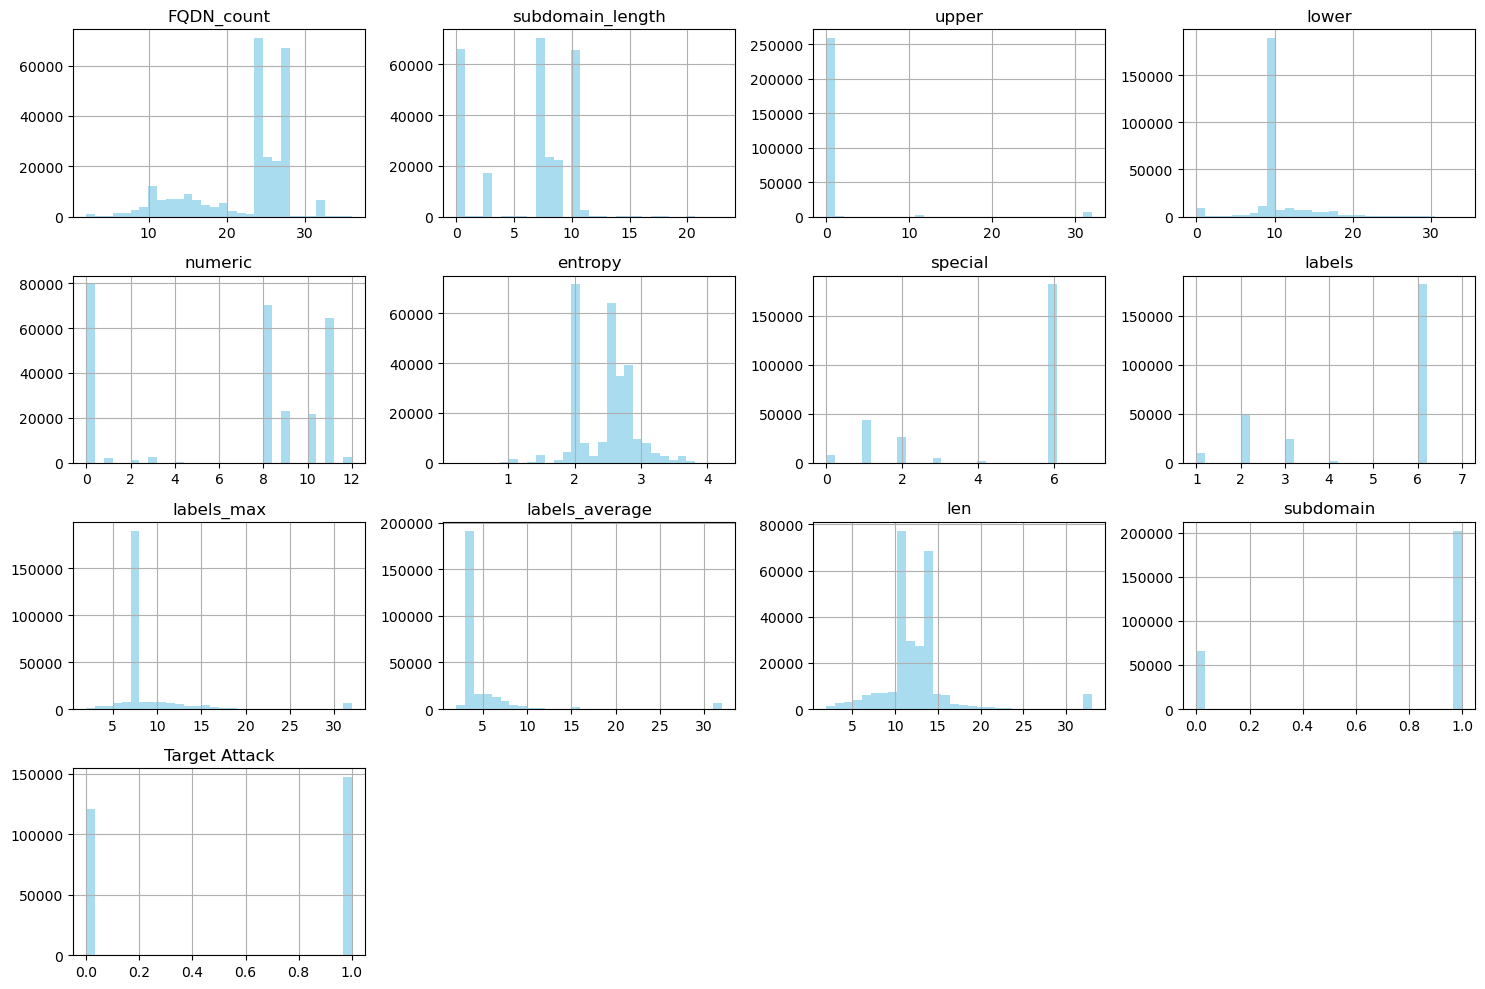

In [9]:
static_dataset.hist(bins=30, color='skyblue', alpha=0.7,figsize=(15, 10))
plt.tight_layout()

plt.show()

### Checking the imbalance in the data

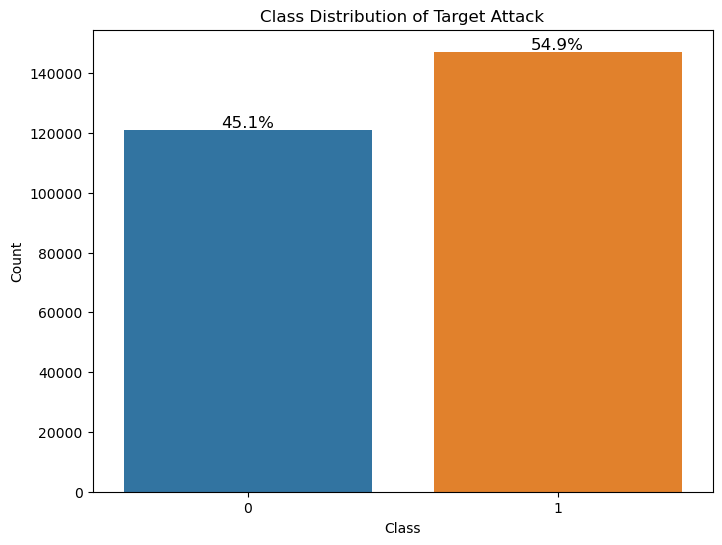

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target Attack', data=static_dataset)
plt.title("Class Distribution of Target Attack")
plt.xlabel("Class")
plt.ylabel("Count")

total_count = len(static_dataset)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total_count:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### PLot skewness for each Feature

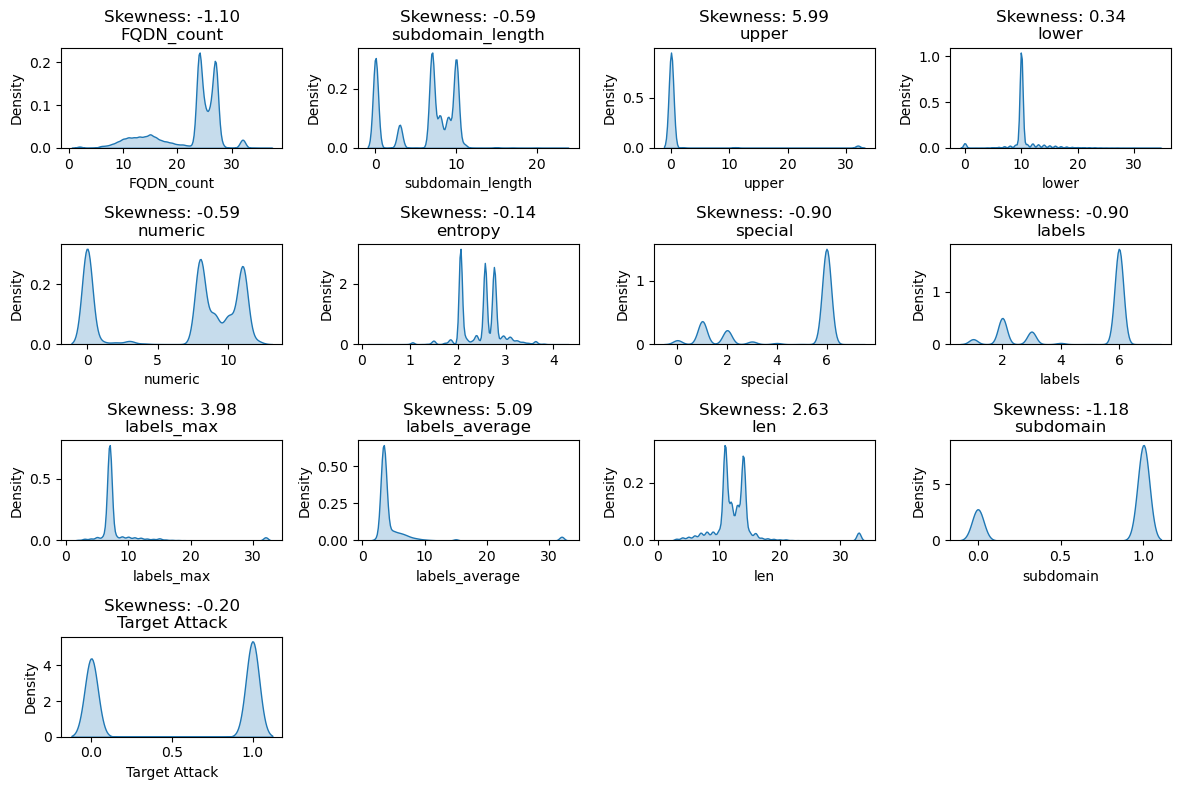

In [11]:
numerical_features = static_dataset.select_dtypes(include=[np.number]).columns

num_plots = len(numerical_features)
num_cols = 4  
num_rows = (num_plots + num_cols - 1) // num_cols 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(static_dataset[feature], fill=True)
    skew = static_dataset[feature].skew()
    plt.title(f"Skewness: {skew:.2f}\n{feature}")

plt.tight_layout()
plt.show()


### Plot Box Plot For each feature 

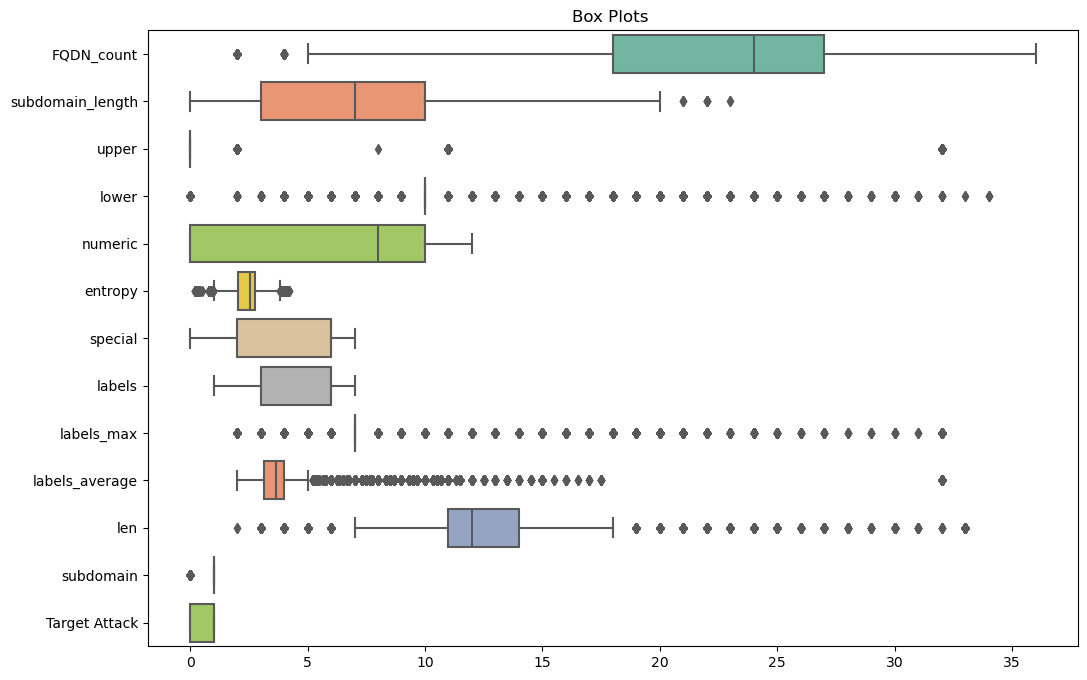

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=static_dataset, orient="h", palette="Set2")
plt.title("Box Plots ")
plt.show()

# 2

## Feature engineering and data cleaning

### Check Missing Values

In [13]:
static_dataset.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

### Drop Rows that contain Missing values

In [14]:
static_dataset.dropna( inplace=True)

###  Check for duplicate rows


In [15]:
static_dataset.duplicated().sum()

91803

### Drop duplicate rows

In [16]:
static_dataset.drop_duplicates(inplace=True)

### Show the unique values for the category columns

In [17]:
static_dataset["sld"].value_counts()

sld
192                                 64258
224                                 40968
DESKTOP-3JF04TC                      1933
FHEPFCELEHFCEPFFFACACACACACACABN     1847
239                                  1190
                                    ...  
lahemal                                 1
ecu                                     1
sph                                     1
magickjewelry                           1
secureserver                            1
Name: count, Length: 11110, dtype: int64

In [18]:
static_dataset["longest_word"].value_counts()

longest_word
2          64655
4          40968
C           2435
N           1847
9           1190
           ...  
onenote        1
mal            1
oke            1
ecu            1
sph            1
Name: count, Length: 6224, dtype: int64

### Encoding the longest_word column using Target Encoder 

In [19]:
target_encoder_longest_word = TargetEncoder()
static_dataset['longest_word'] = target_encoder_longest_word.fit_transform(static_dataset[['longest_word']], static_dataset['Target Attack'])

### Encoding the sld column using Target Encoder 

In [20]:
target_encoder = TargetEncoder()
static_dataset['sld'] = target_encoder.fit_transform(static_dataset[['sld']], static_dataset['Target Attack'])


In [21]:
static_dataset

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,0.667756,0.667800,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,0.668499,0.669056,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,0.670619,0.667850,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,0.668499,0.668882,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,0.717607,0.711851,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268064,25:24.4,24,7,0,10,8,2.054029,6,6,7,3.166667,0.665826,0.667595,11,1,0
268066,09:20.8,27,10,0,10,11,2.570417,6,6,7,3.666667,0.667756,0.668882,14,1,0
268068,21:37.5,12,5,0,10,0,2.817711,2,3,5,3.333333,0.000000,0.000000,9,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,0.668571,0.668882,14,1,0


### check the unique values for the timestamp column

In [22]:
static_dataset["timestamp"].value_counts()

timestamp
57:08.6    13
58:19.6    12
09:02.7    12
12:19.8    12
17:13.8    12
           ..
33:25.2     1
17:37.2     1
16:38.6     1
42:59.3     1
00:40.7     1
Name: count, Length: 35924, dtype: int64

### Drop the timestamp because it has too many unique values

In [23]:
static_dataset_clean=static_dataset.drop(["timestamp"],axis=1)

In [24]:
static_dataset_clean

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,0.667756,0.667800,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,0.668499,0.669056,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,0.670619,0.667850,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,0.668499,0.668882,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,0.717607,0.711851,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268064,24,7,0,10,8,2.054029,6,6,7,3.166667,0.665826,0.667595,11,1,0
268066,27,10,0,10,11,2.570417,6,6,7,3.666667,0.667756,0.668882,14,1,0
268068,12,5,0,10,0,2.817711,2,3,5,3.333333,0.000000,0.000000,9,1,0
268070,27,10,0,10,11,2.767195,6,6,7,3.666667,0.668571,0.668882,14,1,0


# 3

## Feature Filtering/Selection

###  Plot top features and scores

In [25]:
def plot_top_features(features, scores, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=features, y=scores)
    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha='right')
    plt.show()


### Define the Features and Target variable

In [26]:
X = static_dataset_clean.drop(columns=['Target Attack'])  
y = static_dataset_clean['Target Attack']  

### Function Apply_Diff_Feature_Selection To Apply Different Feature Selection technique

In [27]:
def Apply_Diff_Feature_Selection(Function,k_feature,X,y):
    selector = SelectKBest(score_func=Function, k=k_feature)
    X_new = selector.fit_transform(X, y)
    scores = selector.scores_
    selected_features = X.columns[selector.get_support()]
    num_of_select_features=14


    top_features = X.columns[np.argsort(scores)[::-1]][:num_of_select_features]  # Select top 10 features
    top_scores = scores[np.argsort(scores)[::-1]][:num_of_select_features]

    return top_features,top_scores,selected_features


### Chi-squared (chi2)

In [28]:
top_features_chi2,top_scores_chi2,selected_features_chi2=Apply_Diff_Feature_Selection(chi2,'all',X,y)

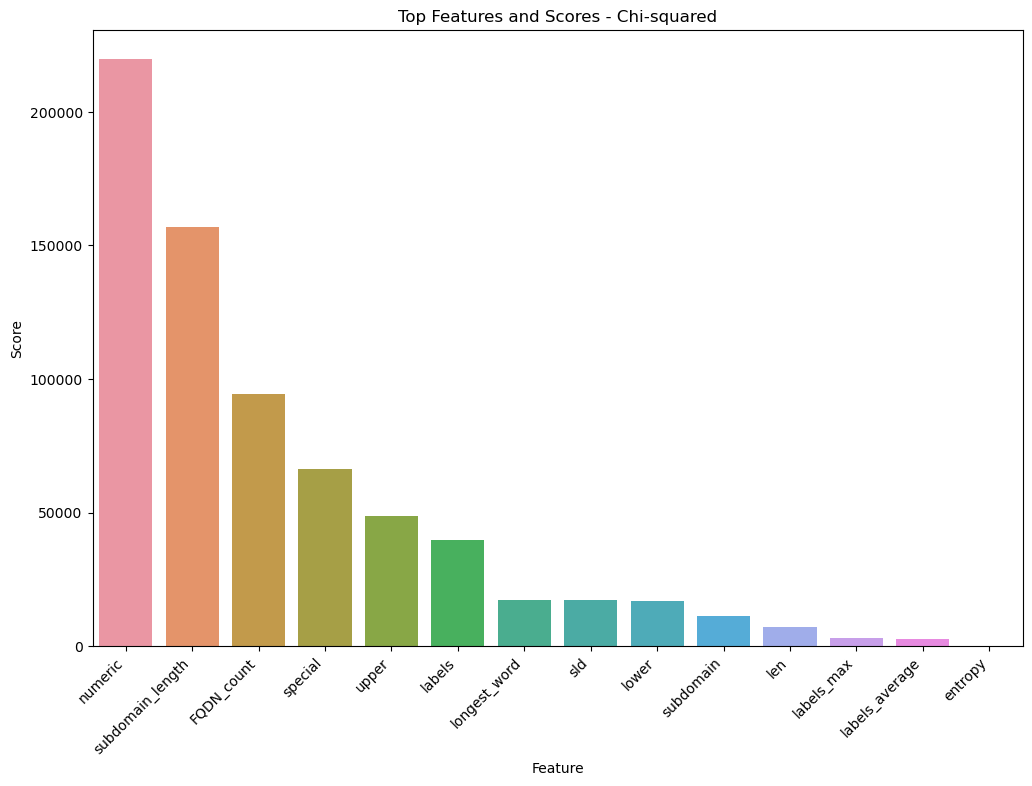

In [29]:
plot_top_features(top_features_chi2, top_scores_chi2, "Top Features and Scores - Chi-squared")

### Mutual Information (mutual info)

In [30]:
top_features_mutual_info,top_scores_mutual_info,selected_features_mutual_info=Apply_Diff_Feature_Selection(mutual_info_classif,'all',X,y)

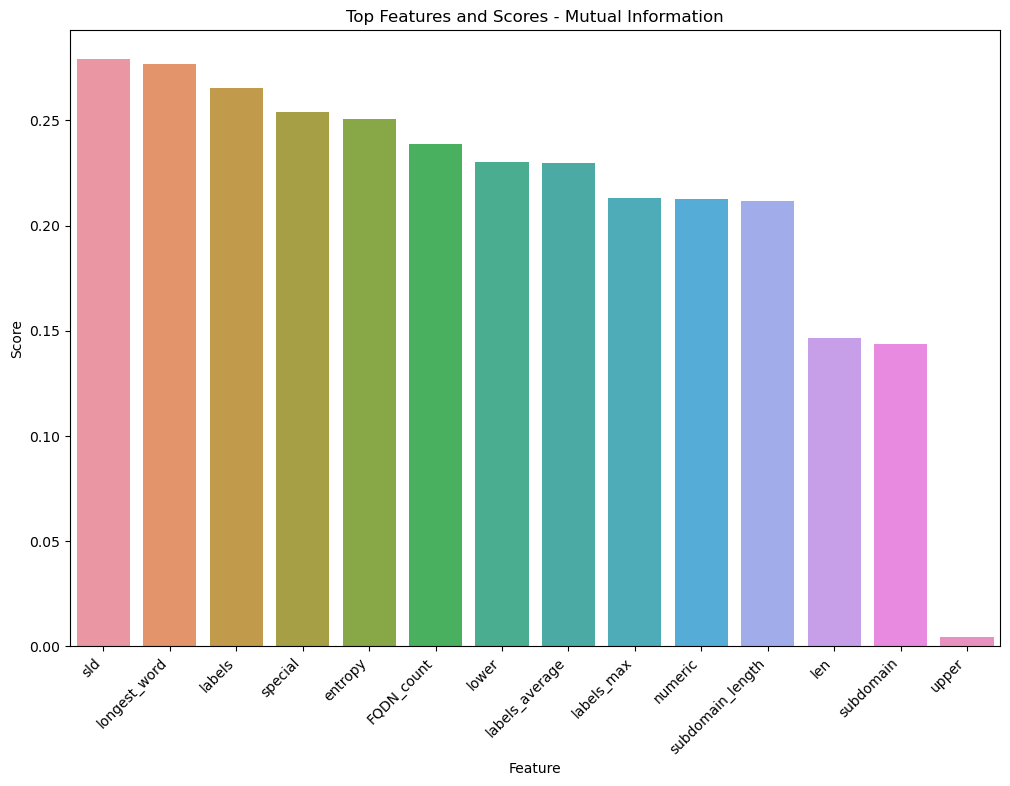

In [31]:
plot_top_features(top_features_mutual_info, top_scores_mutual_info, "Top Features and Scores - Mutual Information")


### ANOVA

In [32]:
top_features_anova,top_scores_anova,selected_features_Anova=Apply_Diff_Feature_Selection(f_classif,'all',X,y)


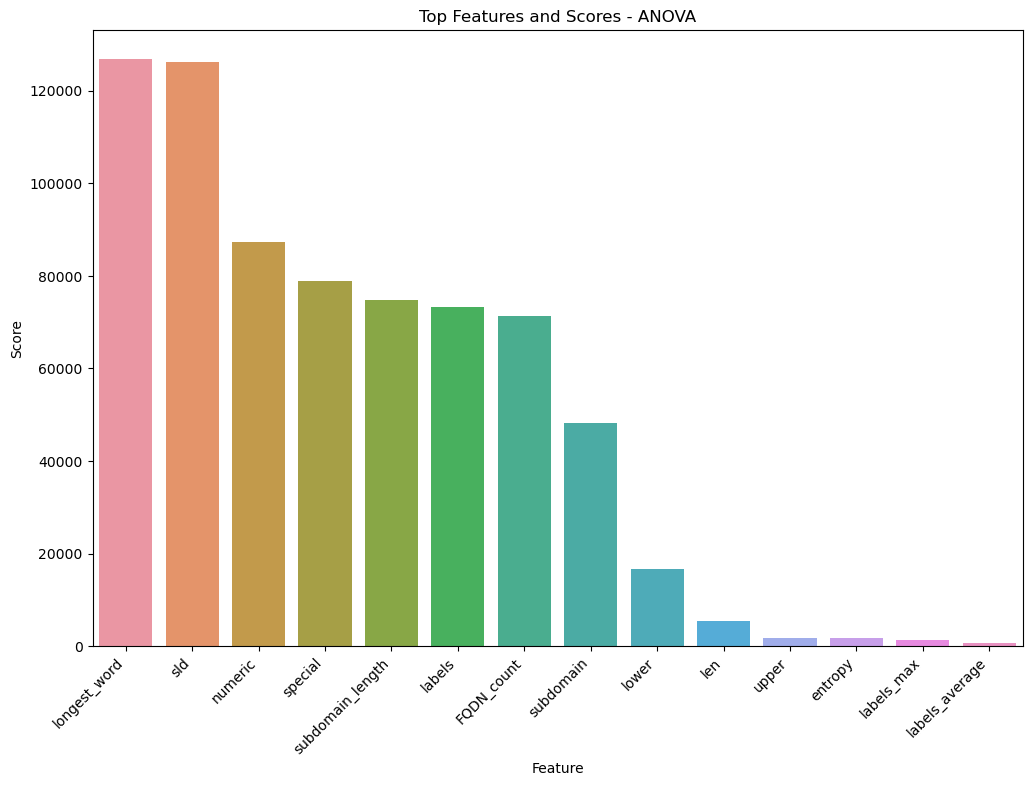

In [33]:
plot_top_features(top_features_anova, top_scores_anova, "Top Features and Scores - ANOVA")


# 4

## Model Training

### Split the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Normalization

In [35]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Base Models 
* Before Applying feature Selection 

#### Model 1: Logistic Regression

In [36]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_normalized, y_train)
y_pred_logistic = logistic_model.predict(X_test_normalized)
f1_score_logistic = f1_score(y_test, y_pred_logistic)
print(f"Logistic Regression f1_score: {f1_score_logistic:.5f}")


Logistic Regression f1_score: 0.80433


#### Model 2: RandomForest

In [37]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_normalized, y_train)
y_pred_rf = rf_model.predict(X_test_normalized)
f1_score_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest f1_score: {f1_score_rf:.5f}")

Random Forest f1_score: 0.80347


### Try Base Models with the feature Selection method

#### based on the visualization of all feature Score choosing the K=8

### Chi-squared

In [38]:
top_features_chi2,top_scores_chi2,selected_features_chi2=Apply_Diff_Feature_Selection(chi2,8,X,y)

### Mutual Information

In [39]:
top_features_mutual_info,top_scores_mutual_info,selected_features_mutual_info=Apply_Diff_Feature_Selection(mutual_info_classif,8,X,y)


### ANOVA

In [40]:
top_features_anova,top_scores_anova,selected_features_Anova=Apply_Diff_Feature_Selection(f_classif,8,X,y)


###  Select New the features for X_train and X_test for each model

In [41]:
X_train_chi2 = X_train[selected_features_chi2]
X_test_chi2 = X_test[selected_features_chi2]

X_train_mutual_info = X_train[selected_features_mutual_info]
X_test_mutual_info = X_test[selected_features_mutual_info]

X_train_anova = X_train[selected_features_Anova]
X_test_anova = X_test[selected_features_Anova]


### Normalization (Scale X_train and X_test for each model )

In [42]:
scaler_Chi_2 = StandardScaler()
X_train_chi2_normalized = scaler_Chi_2.fit_transform(X_train_chi2)
X_test_chi2_normalized = scaler_Chi_2.transform(X_test_chi2)

scaler_mutual = StandardScaler()
X_train_mutual_info_normalized = scaler_mutual.fit_transform(X_train_mutual_info)
X_test_mutual_info_normalized = scaler_mutual.transform(X_test_mutual_info)

scaler_ANOVA = StandardScaler()
X_train_anova_normalized = scaler_ANOVA.fit_transform(X_train_anova)
X_test_anova_normalized = scaler_ANOVA.transform(X_test_anova)


### fit_model user define function to fit the model with x_train,x_test  and predict with x_test then Calculate F1_score

In [43]:
def fit_model(Classifier,x_train,x_test,Y_train,Y_tset):
    Classifier.fit(x_train, Y_train)
    y_pred = Classifier.predict(x_test)
    F1_Score= f1_score(Y_tset, y_pred)
    return F1_Score

### Define the Two Classifier for Models

In [44]:
logistic_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)

### Fit the two Models with the feature obtain from chi2

In [45]:
f1_score_logistic_chi2=fit_model(logistic_model,X_train_chi2_normalized,X_test_chi2_normalized,y_train,y_test)
print(f"Logistic Regression (Chi-squared) F1_score : {f1_score_logistic_chi2:.5f}")

f1_score_rf_chi2=fit_model(rf_model,X_train_chi2_normalized,X_test_chi2_normalized,y_train,y_test)
print(f"Random Forest (Chi-squared) F1_score : {f1_score_rf_chi2:.5f}")

Logistic Regression (Chi-squared) F1_score : 0.80439
Random Forest (Chi-squared) F1_score : 0.80370


### Fit the two Models with the feature obtain from Mutual Information

In [46]:
f1_score_logistic_mutual_info=fit_model(logistic_model,X_train_mutual_info_normalized,X_test_mutual_info_normalized,y_train,y_test)
print(f"Logistic Regression (Mutual Information) F1_score : {f1_score_logistic_mutual_info:.5f}")

f1_score_rf_mutual_info=fit_model(rf_model,X_train_mutual_info_normalized,X_test_mutual_info_normalized,y_train,y_test)
print(f"Random Forest (Mutual Information) F1_score : {f1_score_rf_mutual_info:.5f}")


Logistic Regression (Mutual Information) F1_score : 0.80437
Random Forest (Mutual Information) F1_score : 0.80342


### Fit the two Models with the feature obtain from ANOVA

In [47]:
f1_score_logistic_anova=fit_model(logistic_model,X_train_anova_normalized,X_test_anova_normalized,y_train,y_test)
print(f"Logistic Regression (ANOVA) F1_score : {f1_score_logistic_anova:.5f}")

f1_score_rf_anova=fit_model(rf_model,X_train_anova_normalized,X_test_anova_normalized,y_train,y_test)
print(f"Random Forest (ANOVA) F1_score : {f1_score_rf_anova:.5f}")


Logistic Regression (ANOVA) F1_score : 0.80431
Random Forest (ANOVA) F1_score : 0.80366


### Print F1-score For The four models with each selection methods

In [48]:
header = "Model".ljust(25) +"Base".ljust(15)+ "Chi-squared".ljust(15) + "Mutual Info".ljust(15) + "ANOVA".ljust(15) 

separator = "-" * 100

logistic_row = "Logistic Regression".ljust(25) +f"{f1_score_logistic:.5f}".ljust(15)+ f"{f1_score_logistic_chi2:.5f}".ljust(15) + f"{f1_score_logistic_mutual_info:.5f}".ljust(15) + f"{f1_score_logistic_anova:.5f}".ljust(15) 
rf_row = "Random Forest".ljust(25) +f"{f1_score_rf:.5f}".ljust(15)+ f"{f1_score_rf_chi2:.5f}".ljust(15) + f"{f1_score_rf_mutual_info:.5f}".ljust(15) + f"{f1_score_rf_anova:.5f}".ljust(15) 


table = "\n".join([header, separator, logistic_row, separator,  rf_row,separator])

print(table)


Model                    Base           Chi-squared    Mutual Info    ANOVA          
----------------------------------------------------------------------------------------------------
Logistic Regression      0.80433        0.80439        0.80437        0.80431        
----------------------------------------------------------------------------------------------------
Random Forest            0.80347        0.80370        0.80342        0.80366        
----------------------------------------------------------------------------------------------------


### Function to Plot figure to compare the model with Selection methods 

In [49]:
def plot_model_with_Selection_method(model,accuracies):
   
    feature_selection_methods = ['Base','Chi-squared', 'Mutual Information', 'ANOVA']

  
    # colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5']
    colors = ['#fee0d2', '#fc9272', '#fb6a4a', '#de2d26', '#a50f15']

    plt.figure(figsize=(12, 6))
    for i, method in enumerate(feature_selection_methods):
        plt.bar(f"{method}",accuracies[i],color=colors[i],)
        plt.text(i, accuracies[i], f'{accuracies[i]:.5f}', ha='center', va='bottom', fontsize=12)


    for i, v in enumerate(accuracies):
        plt.text(i, accuracies[i], f'{accuracies[i]:.5f}', ha='center', va='bottom', fontsize=12)

    plt.title(f'{model} Performance with Different Feature Selection Methods')
    plt.ylim([min(accuracies) - 0.01, max(accuracies) + 0.01])  # Set the y-axis limit to 0-1 for accuracy
    plt.xlabel('Feature Selection Method')
    plt.ylabel('F1_Score')
    plt.show()

### Plot figure to compare Logistic Regressionl with Selection methods 

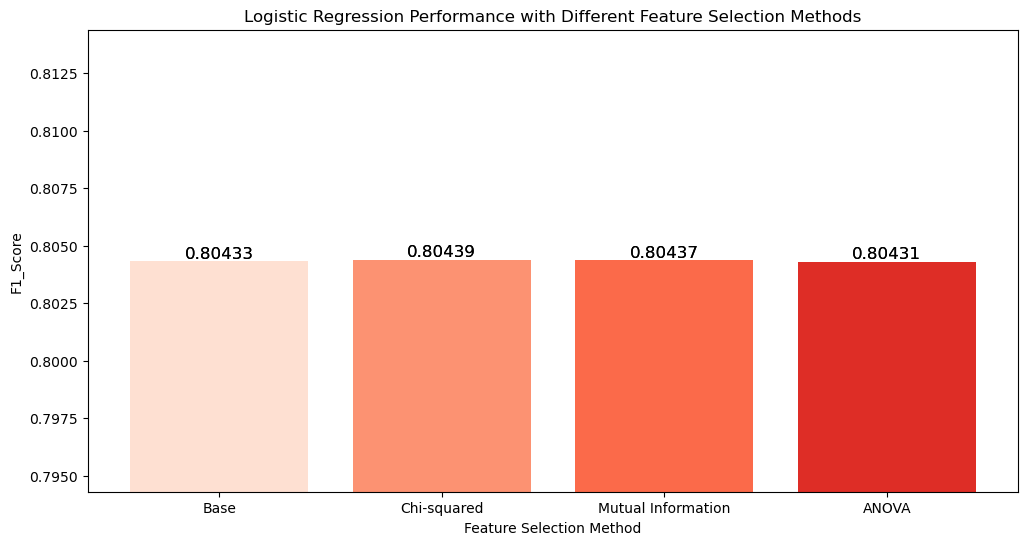

In [50]:
F1_scores_LOgistic = [f1_score_logistic,f1_score_logistic_chi2, f1_score_logistic_mutual_info, f1_score_logistic_anova]
plot_model_with_Selection_method('Logistic Regression',F1_scores_LOgistic)

### ### Plot figure to compare Random Forest with Selection methods 

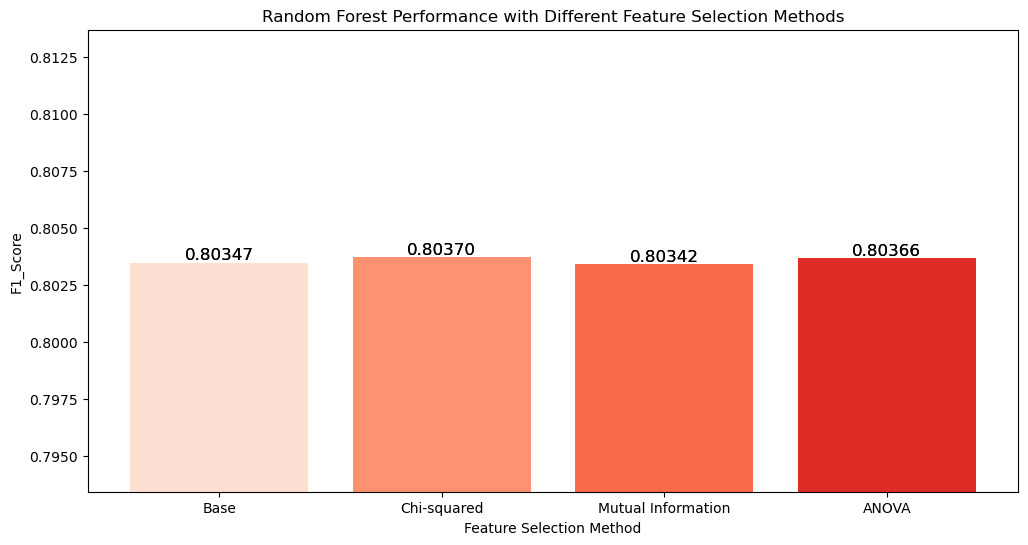

In [51]:
F1_scores_Random_forest = [f1_score_rf,f1_score_rf_chi2, f1_score_rf_mutual_info, f1_score_rf_anova]
plot_model_with_Selection_method('Random Forest',F1_scores_Random_forest)

### Normalize the Feature that we obtain it from Chi-squared

In [52]:
# scaler = MinMaxScaler()
# X_train_chi2_normalized = scaler.fit_transform(X_train_chi2)
# X_test_chi2_normalized = scaler.transform(X_test_chi2)

scaler = StandardScaler()
X_train_chi2_normalized = scaler.fit_transform(X_train_chi2)
X_test_chi2_normalized = scaler.transform(X_test_chi2)

### the Best F1_score with Logistic Regression Using  Chi-squared Feature Selection

In [53]:
f1_score_logistic_chi2=fit_model(logistic_model,X_train_chi2_normalized,X_test_chi2_normalized,y_train,y_test)
print(f"Logistic Regression (Chi-squared) F1_score : {f1_score_logistic_chi2:.5f}")

Logistic Regression (Chi-squared) F1_score : 0.80439


### the Best F1_score with Random Forest using Chi-squared Feature Selection

In [54]:
f1_score_rf_chi2=fit_model(rf_model,X_train_chi2_normalized,X_test_chi2_normalized,y_train,y_test)
print(f"Random Forest (Chi-squared) F1_score : {f1_score_rf_chi2:.5f}")

Random Forest (Chi-squared) F1_score : 0.80370


### Hyperparameter tuning For Logistic Regression

In [55]:
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']  
}

logreg_model = LogisticRegression(solver='liblinear',max_iter=1000) 

logreg_grid = GridSearchCV(logreg_model, logreg_params, cv=5, scoring='f1')
logreg_grid.fit(X_train_chi2_normalized, y_train)

# Print the best parameters and the corresponding F1 score
print("Best Parameters for Logistic Regression: ", logreg_grid.best_params_)
print("F1 Score on Validation Set: ", logreg_grid.best_score_)

Best Parameters for Logistic Regression:  {'C': 0.001, 'penalty': 'l1'}
F1 Score on Validation Set:  0.8036561665714788


### After finding the best parameters, evaluating the Logistic Regression on the test set

In [57]:
y_pred_logreg = logreg_grid.predict(X_test_chi2_normalized)
f1_logreg = f1_score(y_test, y_pred_logreg)
print("F1 Score on Test Set (Logistic Regression): ", f1_logreg)

F1 Score on Test Set (Logistic Regression):  0.8044328895191575


### Hyperparameter tuning For Random Forest

In [58]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train_chi2_normalized, y_train)

# Print the best parameters and the corresponding F1 score
print("Best Parameters for Random Forest: ", rf_grid.best_params_)
print("F1 Score on Validation Set: ", rf_grid.best_score_)

Best Parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score on Validation Set:  0.8034874940707357


### After finding the best parameters, evaluating the Random Forest on the test set

In [59]:
y_pred_rf = rf_grid.predict(X_test_chi2_normalized)
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score on Test Set (Random Forest): ", f1_rf)

F1 Score on Test Set (Random Forest):  0.8043609615132011


# 5

### Create a bar plot to compare accuracies

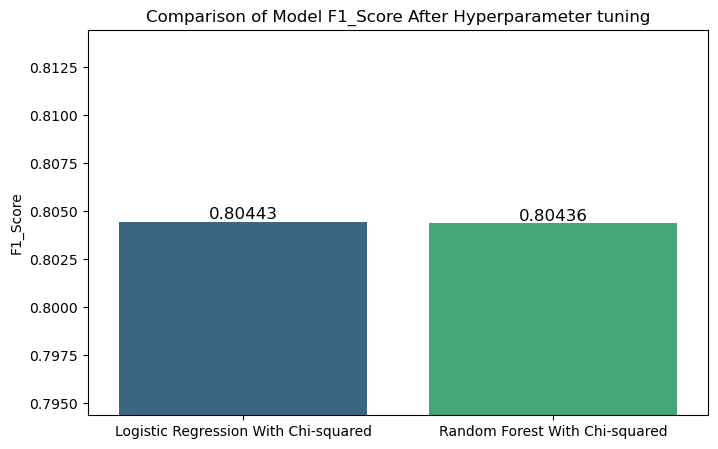

In [60]:

models = ['Logistic Regression With Chi-squared', 'Random Forest With Chi-squared']
accuracies = [f1_logreg, f1_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, method in enumerate(models):
    plt.text(i, accuracies[i], f'{accuracies[i]:.5f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy percentage
plt.title('Comparison of Model F1_Score After Hyperparameter tuning')
plt.ylabel('F1_Score')
plt.ylim([min(accuracies) - 0.01, max(accuracies) + 0.01])  # Set the y-axis limit to 0-1 for accuracy

plt.show()

### Getting Selected features Using Chi-squared

In [61]:
top_features_chi2,top_scores_chi2,selected_features_chi2=Apply_Diff_Feature_Selection(chi2,8,X,y)


In [62]:
selected_features_chi2

Index(['FQDN_count', 'subdomain_length', 'upper', 'numeric', 'special',
       'labels', 'longest_word', 'sld'],
      dtype='object')

### Select the selected features chi2 that was selected by Chi2 from X_train and X_test

In [63]:
X_train_chi2 = X_train[selected_features_chi2]
X_test_chi2 = X_test[selected_features_chi2]

### Scale the X_train_chi2 and the X_test_chi2

In [64]:
scaler_Chi2 = StandardScaler()
X_train_chi2_normalized = scaler_Chi2.fit_transform(X_train_chi2)
X_test_chi2_normalized = scaler_Chi2.transform(X_test_chi2)

### fit the LogisticRegression with the best parameters

In [65]:
Best_logictic_model = LogisticRegression(solver='liblinear',max_iter=1000,C=0.001,penalty='l1') 
Best_logictic_model.fit(X_train_chi2_normalized, y_train)
y_pred_Best_LOgistic_model= Best_logictic_model.predict(X_test_chi2_normalized)
f1_Best_logistic_model = f1_score(y_test, y_pred_Best_LOgistic_model)
print("F1 Score on Test Set (Logistic): ", f1_Best_logistic_model)

F1 Score on Test Set (Logistic):  0.8044328895191575


### Create Pipeline with feature selection followed by Scaler followed by   the Logistic Regression classifier

In [66]:
pipeline = Pipeline([
    ('selected_features',selected_features_chi2),
    ('Scaler', scaler_Chi2),
    ('classifier', Best_logictic_model)
])

In [67]:
with open("pipeline_pickle",'wb') as file:
    pickle.dump(pipeline,file)